In [212]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/atus-practica/.DS_Store
/kaggle/input/atus-practica/atus_anual_csv/leeme_faq.txt
/kaggle/input/atus-practica/atus_anual_csv/.DS_Store
/kaggle/input/atus-practica/atus_anual_csv/metadatos/metadatos_atus_anual_1997_2023.txt
/kaggle/input/atus-practica/atus_anual_csv/diccionario_de_datos/diccionario_de_datos_atus_anual_1997_2023.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_hora.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_municipio.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_dia.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_entidad.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_minuto.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_periodo_mes.csv
/kaggle/input/atus-practica/atus_anual_csv/catalogos/tc_edad.csv
/kaggle/input/atus-practica/atus_anual_csv/conjunto_de_datos/atus_anual_2021.csv
/kaggle/input/atus-practica/atus_anual_csv/conjunto_de_datos/atus_anual_2022.csv
/kaggle/input/atus-pr

# Preparación y limpieza del Dataset


- Realizamos la carga de los 3 datasets necesarios para la practica y posteriormente los concatenamos (juntamos), ademas antes de eso se verifica la correcta carga de los datasets y se encontró que el de 2021 no era correcto, ya que habia un error de formato csv.

In [215]:

# Lee el archivo y limpia las líneas con comas finales
with open('/kaggle/input/atus-practica/atus_anual_csv/conjunto_de_datos/atus_anual_2021.csv', 'r') as file:
    l = file.readlines()

# Elimina comas adicionales al final de cada línea
cl = [line.rstrip(',\n') + '\n' for line in l]

# Escribir las líneas limpiadas a un archivo temporal
with open('/kaggle/working/atus_anual_2021_corr.csv', 'w') as cleaned_file:
    cleaned_file.writelines(cl)



## 1. Cargue en un dataframe los datos de los accidentes de los ultimos 3 años

In [217]:

# cargar en un dataframe los datos de atus_anual_2021_corr.csv, atus_anual_2022.csv, atus_anual_2023.csv
data1 = pd.read_csv('/kaggle/working/atus_anual_2021_corr.csv')
data2 = pd.read_csv('/kaggle/input/atus-practica/atus_anual_csv/conjunto_de_datos/atus_anual_2022.csv')
data3 = pd.read_csv('/kaggle/input/atus-practica/atus_anual_csv/conjunto_de_datos/atus_anual_2023.csv')

df = pd.concat([data1, data2, data3])

df


,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATMUERTO,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,0,Fatal,Cifras Definitivas
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,0,1,0,0,0,0,0,0,No fatal,Cifras Definitivas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,0,No fatal,Cifras Definitivas
396626,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas


## 2. Agregue una columna tipo date formada por los valoresde las columnas correspondientes a Año, Mes, Dia, Hora y Minutos

In [180]:
# convertir datos
df['ANIO'] = df['ANIO'].astype(str)
df['MES'] = df['MES'].astype(str).str.zfill(2)  # Asegura que los meses tengan dos dígitos
df['ID_DIA'] = df['ID_DIA'].astype(str).str.zfill(2)  # Igual para los días
df['ID_HORA'] = df['ID_HORA'].astype(str).str.zfill(2)  # Igual para las horas
df['ID_MINUTO'] = df['ID_MINUTO'].astype(str).str.zfill(2)  # Igual para los minutos

#Agregamos la columna fecha
df['FECHA'] = df['ANIO'] + '-' + df['MES'] + '-' + df['ID_DIA'] + ' ' + df['ID_HORA'] + ':' + df['ID_MINUTO']
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y-%m-%d %H:%M', errors='coerce')

#mostrar el dataframe actualizado
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,FECHA
0,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00
1,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2021-01-01 00:00:00
2,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,2021-01-01 00:00:00
3,Municipal,1,1,2021,01,00,00,01,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:00:00
4,Municipal,1,1,2021,01,00,50,01,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,2021-01-01 00:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-27 14:45:00
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-27 21:40:00
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,2023-12-29 14:30:00
396626,Municipal,32,56,2023,12,00,00,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,2023-12-30 00:00:00


## 3. Agregar columna area

In [218]:
## columna para area cuyos valores serán Urbana o Suburbana dependiendo del área donde ocurrió el accidente.
df.loc[df['URBANA'].isin(['Accidente en intersección', 'Accidente en no intersección']), 'AREA'] = 'Urbana'
df.loc[df['SUBURBANA'].isin(['Accidente en carretera estatal', 'Accidente en camino rural', 'Accidentes en otro camino']), 'AREA'] = 'Suburbana'
df



,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,PEATHERIDO,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,1,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana
396626,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana


## 4. Agregue una columna Zona cuyos valores serán la zona donde ocurrió el accidente

In [219]:
#Asignar las zonas dependiendo el area en que haya ocurrido el accidente
df.loc[df['URBANA'].isin(['Accidente en intersección']), 'ZONA'] = 'Intersección'
df.loc[df['URBANA'].isin(['Accidente en no intersección']), 'ZONA'] = 'No intersección'
df.loc[df['SUBURBANA'].isin(['Accidente en carretera estatal']), 'ZONA'] = 'Carretera estatal'
df.loc[df['SUBURBANA'].isin(['Accidente en camino rural']), 'ZONA'] = 'Camino rural'
df.loc[df['SUBURBANA'].isin(['Accidentes en otro camino']), 'ZONA'] = 'Otro camino'

#Mostrar el dataframe actualizado
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,URBANA,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA,ZONA
0,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Intersección
1,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Intersección
2,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana,Intersección
3,Municipal,1,1,2021,1,0,0,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Intersección
4,Municipal,1,1,2021,1,0,50,1,Viernes,Accidente en intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,No intersección
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,No intersección
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Accidente en no intersección,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,No intersección
396626,Municipal,32,56,2023,12,0,0,30,Sabado,Accidente en no intersección,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,No intersección


## 5. Elimine las columnas URBANA Y SUBURBANA

In [220]:
df = df.drop(['URBANA', 'SUBURBANA'], axis=1, errors='ignore')
df

,COBERTURA,ID_ENTIDAD,ID_MUNICIPIO,ANIO,MES,ID_HORA,ID_MINUTO,ID_DIA,DIASEMANA,TIPACCID,...,CICLMUERTO,CICLHERIDO,OTROMUERTO,OTROHERIDO,NEMUERTO,NEHERIDO,CLASACC,ESTATUS,AREA,ZONA
0,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Intersección
1,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,Intersección
2,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con peatón (atropellamiento),...,0,0,0,0,0,0,Fatal,Cifras Definitivas,Urbana,Intersección
3,Municipal,1,1,2021,1,0,0,1,Viernes,Colisión con objeto fijo,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Intersección
4,Municipal,1,1,2021,1,0,50,1,Viernes,Colisión con peatón (atropellamiento),...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,Intersección
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396623,Municipal,32,56,2023,12,14,45,27,Miercoles,Volcadura,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,No intersección
396624,Municipal,32,56,2023,12,21,40,27,Miercoles,Colisión con motocicleta,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,No intersección
396625,Municipal,32,56,2023,12,14,30,29,Viernes,Colisión con vehículo automotor,...,0,0,0,0,0,0,No fatal,Cifras Definitivas,Urbana,No intersección
396626,Municipal,32,56,2023,12,0,0,30,Sabado,Colisión con vehículo automotor,...,0,0,0,0,0,0,Sólo daños,Cifras Definitivas,Urbana,No intersección


## 6. Determine cual municipio de cada estado tuvo más meses sin accidentes

In [184]:
#municipio de cada estado que estuvo más meses sin accidentes


MSA = df[df['AREA'].isnull()]

r = MSA.groupby(['ID_ENTIDAD', 'ID_MUNICIPIO']).size().reset_index(name='MSA')

munMSA = r.loc[r.groupby('ID_ENTIDAD')['MSA'].idxmax()]

munMSA

,ID_ENTIDAD,ID_MUNICIPIO,MSA
2,1,9,20
6,4,7,23
9,5,1,36
30,6,6,8
31,7,1,36
155,8,25,36
179,10,20,26
186,11,6,36
230,12,47,36
260,13,2,36


## 7. Resuma los accidentes del último año por tipo y que porcentaje representan

In [221]:
# Tipos de accidentes a analizar
tipos_acc = [
    'Caída de pasajero',
    'Certificado cero',
    'Colisión con animal',
    'Colisión con ciclista',
    'Colisión con ferrocarril',
    'Colisión con motocicleta',
    'Colisión con objeto fijo',
    'Colisión con peatón (atropellamiento)',
    'Colisión con vehiculo automotor',
    'Incendio',
    'Otro',
    'Salida del camino',
    'Volcadura'
]

# accidentes del año 2023
acc_2023 = df[
    (df['ANIO'] == 2023) & 
    (df['TIPACCID'].isin(tipos_acc))
]

# Agrupar por tipo y contar
resumen = df.groupby('TIPACCID').size().reset_index(name='Total')

#porcentaje
resumen['Porc'] = (resumen['Total'] / resumen['Total'].sum()) * 100
resultados_df = pd.DataFrame(resumen)

# Mostrar el resumen
resultados_df


,TIPACCID,Total,Porc
0,Caída de pasajero,5347,0.466721
1,Certificado cero,46959,4.098885
2,Colisión con animal,2983,0.260376
3,Colisión con ciclista,11855,1.034781
4,Colisión con ferrocarril,767,0.066949
5,Colisión con motocicleta,157625,13.758529
6,Colisión con objeto fijo,137526,12.004158
7,Colisión con peatón (atropellamiento),33136,2.892324
8,Colisión con vehículo automotor,668453,58.346899
9,Incendio,1017,0.088770


## 8. Obtenga la cantidad de muertos y lesionados de los últimos 3 años

In [223]:
cols_muertos = ['CONDMUERTO', 'PASAMUERTO', 'PEATMUERTO', 'CICLMUERTO', 'OTROMUERTO', 'NEMUERTO']
cols_heridos = ['CONDHERIDO', 'PASAHERIDO', 'PEATHERIDO', 'CICLHERIDO', 'OTROHERIDO', 'NEHERIDO']

df_accidentes=df[df['ANIO'].isin([2021, 2022, 2023])]

# Sumar los valores de muertos y heridos para los últimos 3 años
total_muertos = df_accidentes[cols_muertos].sum().sum()
total_heridos = df_accidentes[cols_heridos].sum().sum()

# Mostrar los resultados
print(f"Total de muertos (2021-2023): {total_muertos}")
print(f"Total de heridos (2021-2023): {total_heridos}")


Total de muertos (2021-2023): 14385
Total de heridos (2021-2023): 264467


## 9. ¿Cómo se compara el número de accidentes de cada año contra el anterior? ¿En qué porcentaje varió?

In [224]:

accidentes_por_anio = df['ANIO'].value_counts().sort_index()
# Calcular la variación porcentual respecto al año anterior
variacion_porcentual = accidentes_por_anio.pct_change() * 100

# resutados en un dataframe
comparacion_df = pd.DataFrame({'Accidentes anuales': accidentes_por_anio,'Variación (%)': variacion_porcentual}).fillna(0)  # Rellenar NaN con 0 para el primer año

# Mostrar la comparación
print(comparacion_df)


      Accidentes anuales  Variación (%)
ANIO                                   
2021              356315       0.000000
2022              392710      10.214277
2023              396628       0.997683


## 10. Seleccione una o dos características y haga una gráfica de cada una de las siguientes:
1. Histograma
2. Dispersión
3. Líneas

En mi caso elegi hacer graficas para los accidentes con respecto al dia de la semana.

In [225]:
# Contar la cantidad de accidentes por día de la semana
accidentes_por_dia = df['DIASEMANA'].value_counts().sort_index()
# Mostrar resultados para referencia
print(accidentes_por_dia)

DIASEMANA
Domingo            159867
Jueves             148411
Martes             145433
Miercoles          145584
No especificado         5
Sabado             178243
Viernes            167212
lunes              200898
Name: count, dtype: int64


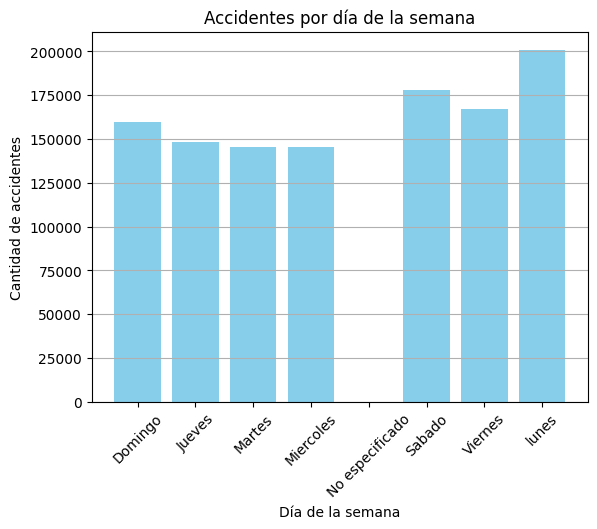

In [226]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras de accidentes por día de la semana
plt.bar(accidentes_por_dia.index, accidentes_por_dia.values, color='skyblue')

# Etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Accidentes por día de la semana')

# Mostrar la gráfica
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()



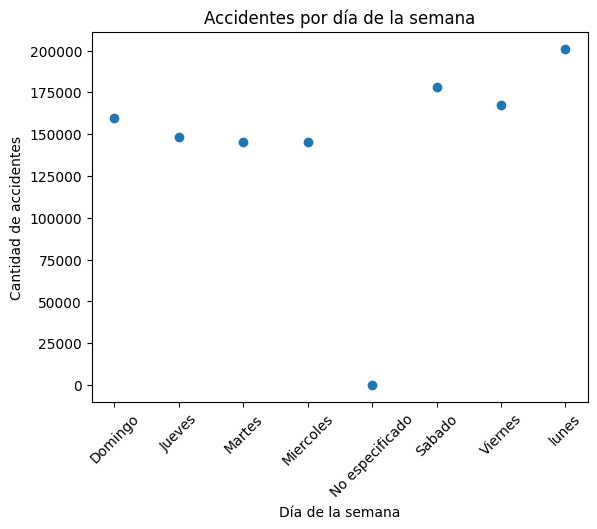

In [190]:

# Crear un gráfico de dispersión de accidentes por día de la semana
plt.scatter(accidentes_por_dia.index, accidentes_por_dia.values)

# Etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Accidentes por día de la semana')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.show()




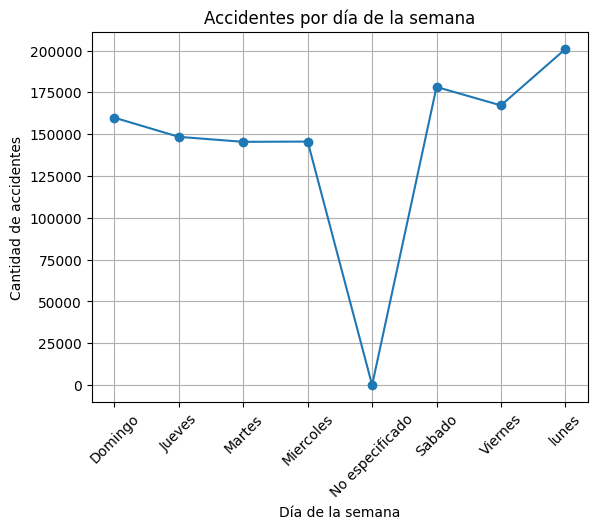

In [227]:

# Crear un gráfico de líneas de accidentes por día de la semana
plt.plot(accidentes_por_dia.index, accidentes_por_dia.values, marker='o')  # 'o' agrega marcadores en los puntos

# Etiquetas y título
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de accidentes')
plt.title('Accidentes por día de la semana')

# Mostrar la gráfica
plt.xticks(rotation=45) 
plt.grid()  
plt.show()

